### Advanced Regression - Assignment Solution

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from datetime import date
from sklearn.model_selection import train_test_split

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [101]:
# reading the dataset
houseData = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
houseTest = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [102]:
houseData.shape ,houseTest.shape

((1460, 81), (1459, 80))

In [103]:
houseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [104]:
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [105]:
houseData.head()
#function to find the missing column in test dataset, so as to make predictions.
def column_difference(test,train):
    test_col= test.columns
    train_col = train.columns
    print(train_col.difference(test_col))
column_difference(houseTest,houseData)

Index(['SalePrice'], dtype='object')


In [106]:
##### Verify and remove any columns which has unique values in it
def removeUniqueValueColumn(data):
    data.shape
    data=data.loc[:,data.nunique()!=1]
    return data
houseData = removeUniqueValueColumn(houseData)

#Function to write predicted SalePrice values for test data
def write_prediction(prediction, name):
    Id = np.array(houseTest["Id"]).astype(int)
    solution = pd.DataFrame(prediction, Id, columns = ["SalePrice"])
    solution.to_csv(name, index_label = ["Id"])

In [107]:
#Remove any rows with duplicate data
len(houseData) - len(houseData.drop_duplicates())
column_difference(houseTest,houseData)

Index(['SalePrice'], dtype='object')


In [108]:
# List of columns with null values
def missingDataPercentage(df):
    missingData = df[df.columns[df.isnull().any()]].isna().sum()
    print(missingData/len(df)*100)
    
missingDataPercentage(houseData)
missingDataPercentage(houseTest)  

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64
MSZoning         0.274160
LotFrontage     15.558602
Alley           92.666210
Utilities        0.137080
Exterior1st      0.068540
Exterior2nd      0.068540
MasVnrType      61.274846
MasVnrArea       1.028101
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinSF1       0.068540
BsmtFinType2     2.878684
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
TotalBsmtSF      0.068540
BsmtFullBath     0.137080
BsmtHalfBath     0.1370

In [109]:
column_difference(houseTest,houseData)

Index(['SalePrice'], dtype='object')


In [110]:
#Removing columns with the most number of null or missing values 
#Columns Alley,FireplaceQu,PoolQC,Fence,MiscFeature,LotFrontage
def dropColumnsWithMostNulls(data):
    data = data.drop(['Alley', 'FireplaceQu','PoolQC','Fence','MiscFeature','LotFrontage','Utilities'], axis = 1)
    return data
houseData=dropColumnsWithMostNulls(houseData)
missingDataPercentage(houseData)

MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64


In [111]:
#Similarly for test dataset, dropping columns with most missing values.
houseTest=dropColumnsWithMostNulls(houseTest)
missingDataPercentage(houseTest)

MSZoning         0.274160
Exterior1st      0.068540
Exterior2nd      0.068540
MasVnrType      61.274846
MasVnrArea       1.028101
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinSF1       0.068540
BsmtFinType2     2.878684
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
TotalBsmtSF      0.068540
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
KitchenQual      0.068540
Functional       0.137080
GarageType       5.209047
GarageYrBlt      5.346127
GarageFinish     5.346127
GarageCars       0.068540
GarageArea       0.068540
GarageQual       5.346127
GarageCond       5.346127
SaleType         0.068540
dtype: float64


In [112]:
def column_dataQuality(data,column):
    print(data[column].unique(),'\n')
    print('Null value percentage: ',data[column].isna().sum()*100/len(data[column]),'\n')
    print(data[column].describe())

In [113]:
houseData.shape

(1460, 74)

In [114]:
column_difference(houseTest,houseData)

Index(['SalePrice'], dtype='object')


In [115]:
#Imputing missing values for the categorical feature data 
for column in houseData[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType','Electrical']]:
    houseData[column].fillna(houseData[column].mode()[0], inplace=True)

In [116]:
#Again checking for missing data percentage after imputing missing values.
missingDataPercentage(houseData)

MasVnrArea     0.547945
GarageYrBlt    5.547945
dtype: float64


In [117]:
#Similarly checking for missing values and imputations in test dataset.
for column in houseTest[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType','Electrical']]:
    houseTest[column].fillna(houseTest[column].mode()[0], inplace=True)
missingDataPercentage(houseTest)

MSZoning        0.274160
Exterior1st     0.068540
Exterior2nd     0.068540
MasVnrArea      1.028101
BsmtFinSF1      0.068540
BsmtFinSF2      0.068540
BsmtUnfSF       0.068540
TotalBsmtSF     0.068540
BsmtFullBath    0.137080
BsmtHalfBath    0.137080
KitchenQual     0.068540
Functional      0.137080
GarageYrBlt     5.346127
GarageCars      0.068540
GarageArea      0.068540
SaleType        0.068540
dtype: float64


In [118]:
#Imputing missing values in numerical columns with median 
def imputeNumericData(data):
    columns = data.select_dtypes(include=np.number).columns.tolist()
    for column in columns:
        data[column].fillna(data[column].median(), inplace=True)
    return data
houseData = imputeNumericData(houseData)
hosueTest = imputeNumericData(houseTest)


#Checking whether any null values are present in the dataframe    
missingDataPercentage(houseData)
houseData.isnull().sum().sum()

Series([], dtype: float64)


0

In [119]:
#looking for missing values in test dataset
houseTest.isnull().sum().sum()
missingDataPercentage(houseTest)

MSZoning       0.27416
Exterior1st    0.06854
Exterior2nd    0.06854
KitchenQual    0.06854
Functional     0.13708
SaleType       0.06854
dtype: float64


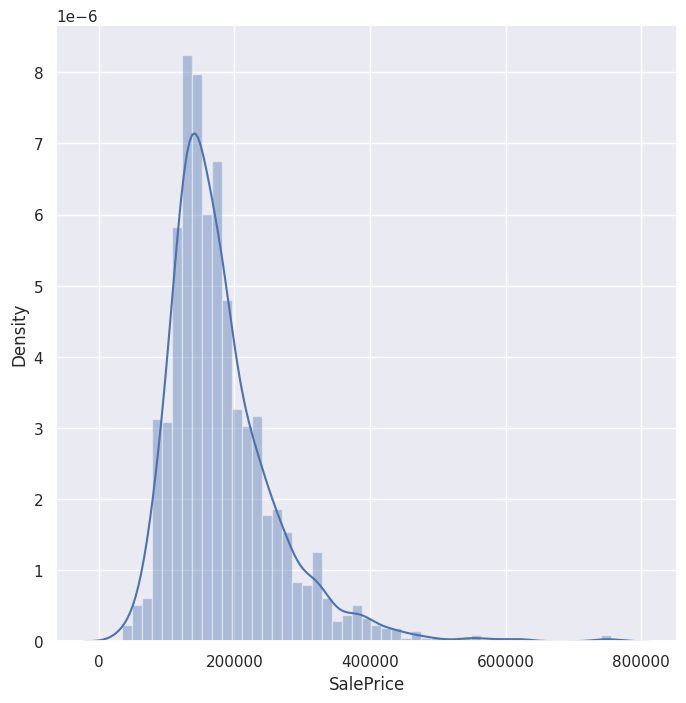

In [120]:
# plot showing distribution of target variable in train dataset.
sns.distplot(houseData['SalePrice'])
plt.show()

In [121]:
houseData['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [122]:
#Finding correlations of all features or predictor variables against the SalePrice or target varianle.
def correlation_houseData(df):
    corr_houseData=df.corr()['SalePrice']
    return corr_houseData
# #sorting correlations of predictor and target variables in descending order.
# correlation_houseData(houseData).sort_values(ascending=False)

In [123]:
#Checking how the numerical data of the dataset is distributed (before doing any outlier treatment)
houseData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


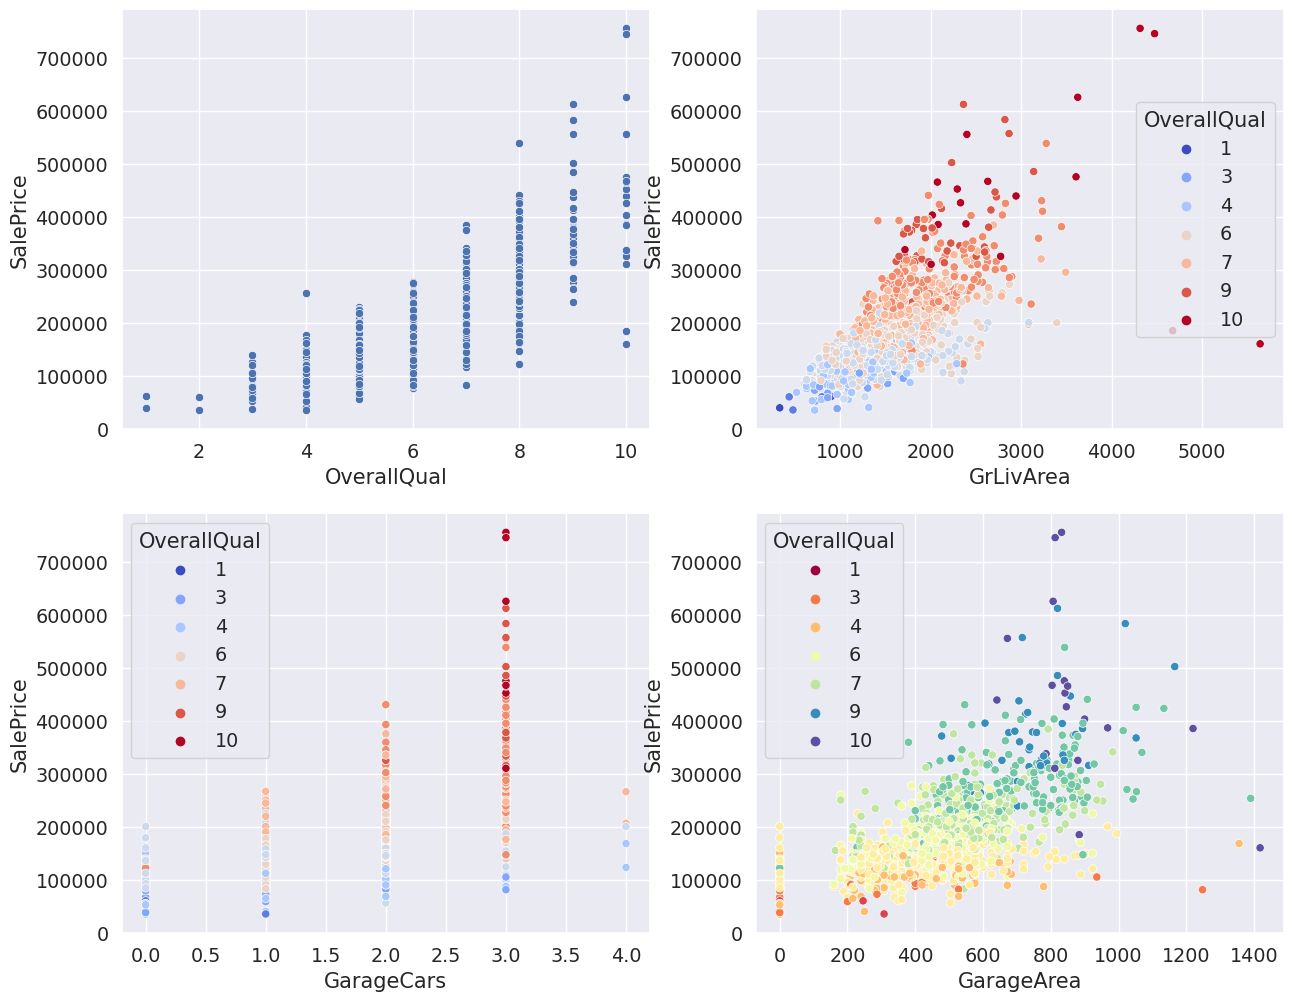

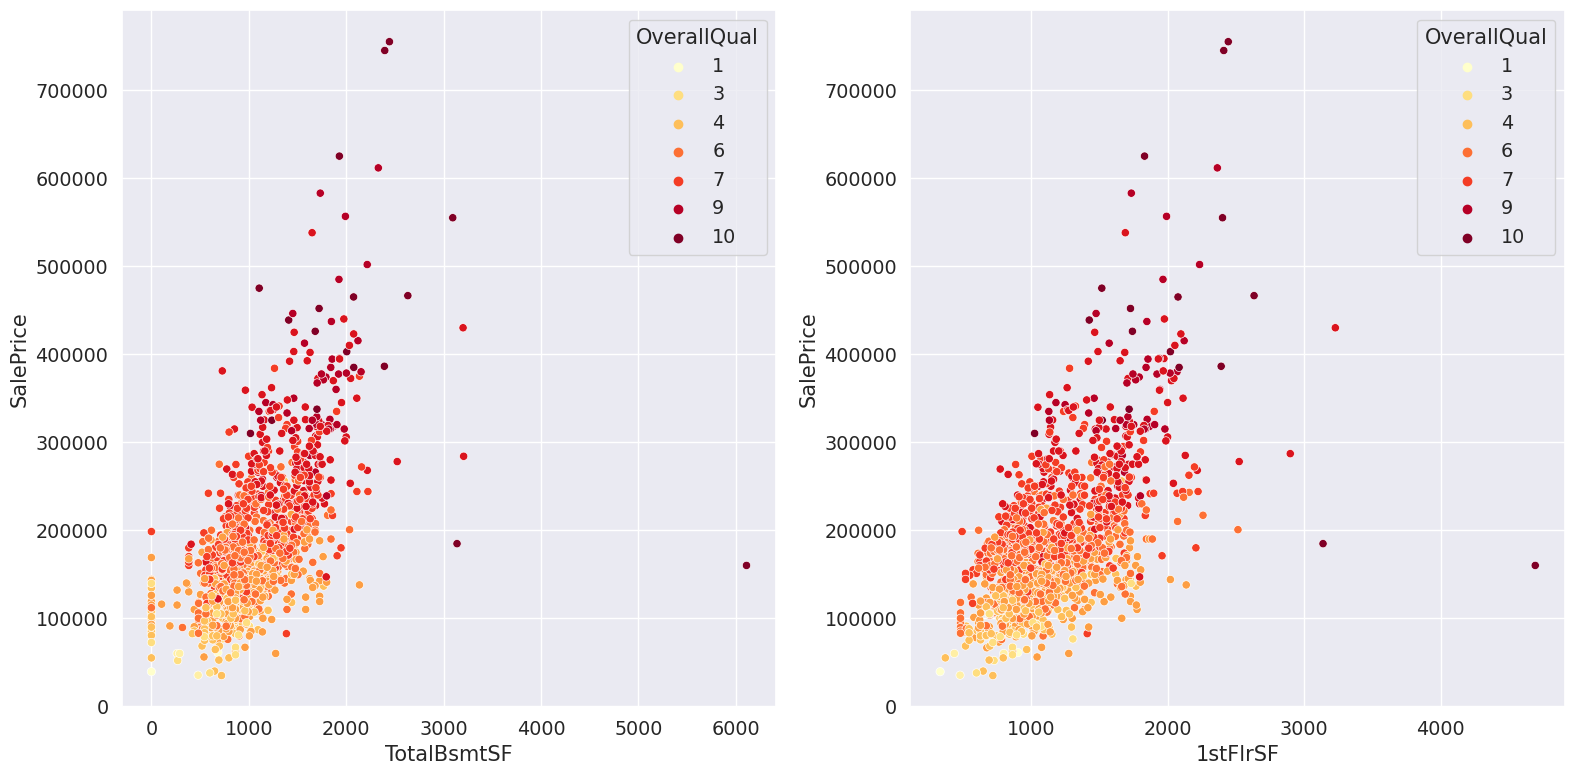

In [124]:
fig = plt.figure(figsize=(15, 12))
sns.set(font_scale=1.25)

#Box plot overallqual/salePrice
fig1 = fig.add_subplot(221); 
sns.scatterplot(x='OverallQual', y='SalePrice', data=houseData[['SalePrice', 'OverallQual']])

# GrLivArea vs SalePrice plot
fig2 = fig.add_subplot(222); 
sns.scatterplot(x = houseData.GrLivArea, y = houseData.SalePrice, hue=houseData.OverallQual, palette= 'coolwarm')

# GarageCars vs SalePrice plot
fig3 = fig.add_subplot(223); 
sns.scatterplot(x = houseData.GarageCars, y = houseData.SalePrice, hue=houseData.OverallQual, palette= 'coolwarm')

#GarageArea vs SalePrice plot
fig4 = fig.add_subplot(224); 
sns.scatterplot(x = houseData.GarageArea, y = houseData.SalePrice, hue=houseData.OverallQual, palette= 'Spectral')

fig5 = plt.figure(figsize=(16, 8))
fig6 = fig5.add_subplot(121); 
sns.scatterplot(y = houseData.SalePrice , x = houseData.TotalBsmtSF, hue=houseData.OverallQual, palette= 'YlOrRd')

fig7 = fig5.add_subplot(122); 
sns.scatterplot(y = houseData.SalePrice, x = houseData['1stFlrSF'], hue=houseData.OverallQual, palette= 'YlOrRd')

plt.tight_layout(); 
plt.show()


In [125]:
houseData = houseData.drop(houseData[(houseData.GrLivArea>5000) & (houseData.SalePrice<200000)].index)
houseData.shape

(1459, 74)

In [126]:
houseTest.shape

(1459, 73)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

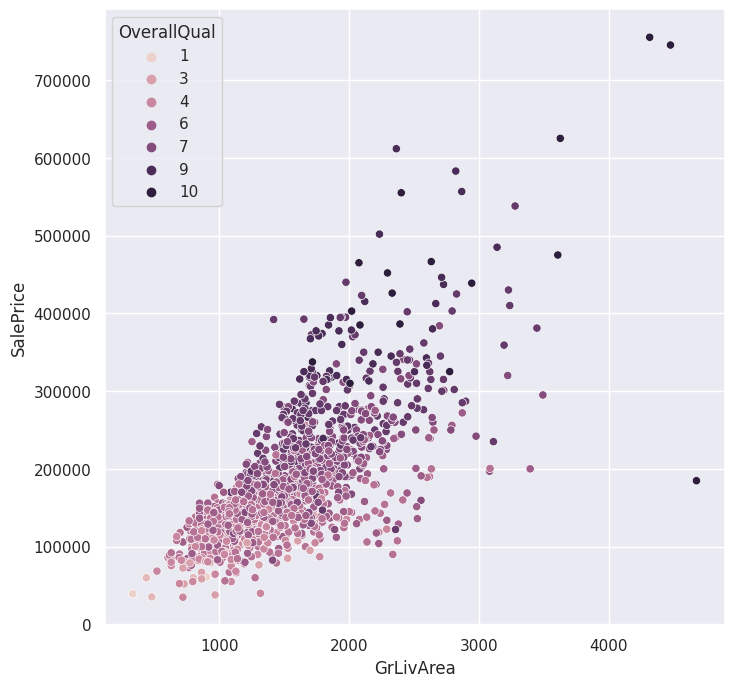

In [127]:
#Plotting the age of the house against the house sale price
fig1 = fig.add_subplot(111);
sns.set(font_scale=1)
sns.scatterplot(x = houseData.GrLivArea, y = houseData.SalePrice, hue=houseData.OverallQual)

In [128]:
#to find the Age of the house.
today = date.today()
currYear = today.year
houseData['age'] = (currYear - houseData['YearBuilt'])
houseTest['age'] = (currYear - houseTest['YearBuilt'])

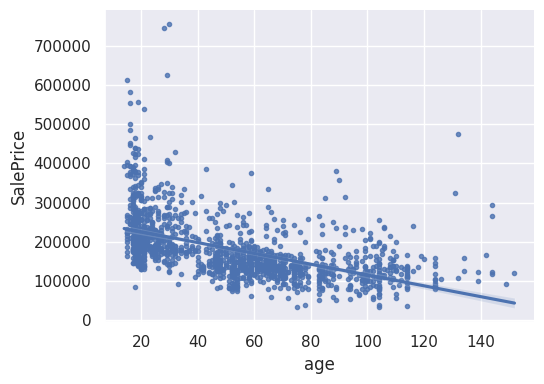

In [129]:
#plot of Age versus SalePrice
sns.lmplot(y = 'SalePrice', x = 'age', data=houseData, markers='.',aspect=1.4, height=4)
plt.show();  

In [130]:
#We can clearly see that newer the house, higher the price is. 

In [131]:
houseData.shape

(1459, 75)

In [132]:
#Function to find categorical variables

def find_categorical_columns(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    print("categorical columns : ",len(categorical_cols))
    return categorical_cols

# for train dataset    
categorical_cols_train =find_categorical_columns(houseData)  

categorical columns :  37


In [133]:
houseData[categorical_cols_train].nunique()
for column in categorical_cols_train:
    houseData[column] = houseData[column].astype('category')

In [134]:
#for test dataset
categorical_cols_test = find_categorical_columns(houseTest)
    
for column in categorical_cols_test:
    houseTest[column] = houseTest[column].astype('category')

categorical columns :  37


### Data Preperation for model building 

In [48]:
#checking datatypes of variables in test dataset
houseTest.dtypes

Id                  int64
MSSubClass          int64
MSZoning         category
LotArea             int64
Street           category
                   ...   
MoSold              int64
YrSold              int64
SaleType         category
SaleCondition    category
age                 int64
Length: 74, dtype: object

In [49]:
# split into X and y
X = houseData.drop(['SalePrice'], axis=1)
X.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,age
0,1,60,RL,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,21
1,2,20,RL,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,48
2,3,60,RL,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,23
3,4,70,RL,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,109
4,5,60,RL,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,24


In [135]:
#checking datatypes of variables in train dataset
houseData.dtypes

Id                  int64
MSSubClass          int64
MSZoning         category
LotArea             int64
Street           category
                   ...   
YrSold              int64
SaleType         category
SaleCondition    category
SalePrice           int64
age                 int64
Length: 75, dtype: object

In [137]:
houseData.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch

In [138]:
#Encoding all categorical variables in train dataset to numerical using label encoder technique. 
for column in categorical_cols_train:
    houseData[column]=houseData[column].cat.codes
houseData.head()
    

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,age
0,1,60,3,8450,1,3,3,4,0,5,...,0,0,0,0,2,2008,8,4,208500,21
1,2,20,3,9600,1,3,3,2,0,24,...,0,0,0,0,5,2007,8,4,181500,48
2,3,60,3,11250,1,0,3,4,0,5,...,0,0,0,0,9,2008,8,4,223500,23
3,4,70,3,9550,1,0,3,0,0,6,...,0,0,0,0,2,2006,8,0,140000,109
4,5,60,3,14260,1,0,3,2,0,15,...,0,0,0,0,12,2008,8,4,250000,24


In [139]:
#Encoding all categorical variables in test dataset to numerical using label encoder technique. 
for column in categorical_cols_test:
    houseTest[column]=houseTest[column].cat.codes
houseTest.head()
 

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,age
0,1461,20,2,11622,1,3,3,4,0,12,...,0,0,120,0,0,6,2010,8,4,63
1,1462,20,3,14267,1,0,3,0,0,12,...,0,0,0,0,12500,6,2010,8,4,66
2,1463,60,3,13830,1,0,3,4,0,8,...,0,0,0,0,0,3,2010,8,4,27
3,1464,60,3,9978,1,0,3,4,0,8,...,0,0,0,0,0,6,2010,8,4,26
4,1465,120,3,5005,1,0,1,4,0,22,...,0,0,144,0,0,1,2010,8,4,32


In [140]:
# correlation_house_Data(houseData).sort_values(ascending=False)
houseData.shape,houseTest.shape

((1459, 75), (1459, 74))

In [141]:
# split into X and y
X = houseData.drop(['SalePrice'], axis=1)
y= houseData['SalePrice']
X.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,age
0,1,60,3,8450,1,3,3,4,0,5,...,0,0,0,0,0,2,2008,8,4,21
1,2,20,3,9600,1,3,3,2,0,24,...,0,0,0,0,0,5,2007,8,4,48
2,3,60,3,11250,1,0,3,4,0,5,...,0,0,0,0,0,9,2008,8,4,23
3,4,70,3,9550,1,0,3,0,0,6,...,272,0,0,0,0,2,2006,8,0,109
4,5,60,3,14260,1,0,3,2,0,15,...,0,0,0,0,0,12,2008,8,4,24


In [143]:
houseTest.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,age
0,1461,20,2,11622,1,3,3,4,0,12,...,0,0,120,0,0,6,2010,8,4,63
1,1462,20,3,14267,1,0,3,0,0,12,...,0,0,0,0,12500,6,2010,8,4,66
2,1463,60,3,13830,1,0,3,4,0,8,...,0,0,0,0,0,3,2010,8,4,27
3,1464,60,3,9978,1,0,3,4,0,8,...,0,0,0,0,0,6,2010,8,4,26
4,1465,120,3,5005,1,0,1,4,0,22,...,0,0,144,0,0,1,2010,8,4,32


In [144]:
### Feature Scaling

In [145]:
from sklearn.preprocessing import scale


In [146]:
# scaling the features

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch

In [147]:
X.describe()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,age
count,1459.000000,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,...,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03
mean,0.000000,-4.322184e-17,-1.789750e-16,-9.253127e-17,-2.386333e-16,-4.139557e-17,-1.205342e-16,-8.766120e-17,-1.461020e-17,-4.383060e-17,...,-1.217517e-18,-2.922040e-17,4.870067e-18,-9.740133e-18,9.740133e-18,-7.061597e-17,4.436022e-14,1.193166e-16,-1.120115e-16,-7.061597e-17
std,1.000343,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,...,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-1.730427,-8.722152e-01,-4.792255e+00,-9.289007e-01,-1.556171e+01,-1.378433e+00,-3.948332e+00,-1.864154e+00,-2.257974e-01,-2.038363e+00,...,-3.594639e-01,-1.163797e-01,-2.703077e-01,-6.368676e-02,-8.771809e-02,-1.972409e+00,-1.367100e+00,-4.842794e+00,-3.425811e+00,-1.283885e+00
25%,-0.865345,-8.722152e-01,-4.554757e-02,-2.965975e-01,6.426031e-02,-1.378433e+00,3.135297e-01,-6.301247e-01,-2.257974e-01,-8.740565e-01,...,-3.594639e-01,-1.163797e-01,-2.703077e-01,-6.368676e-02,-8.771809e-02,-4.909445e-01,-6.141371e-01,3.131935e-01,2.092859e-01,-9.526225e-01
50%,-0.000262,-1.630036e-01,-4.554757e-02,-1.015134e-01,6.426031e-02,7.505018e-01,3.135297e-01,6.039048e-01,-2.257974e-01,-4.240890e-02,...,-3.594639e-01,-1.163797e-01,-2.703077e-01,-6.368676e-02,-8.771809e-02,-1.205784e-01,1.388260e-01,3.131935e-01,2.092859e-01,-5.821494e-02
75%,0.864821,3.098041e-01,-4.554757e-02,1.133018e-01,6.426031e-02,7.505018e-01,3.135297e-01,6.039048e-01,-2.257974e-01,7.892387e-01,...,-3.594639e-01,-1.163797e-01,-2.703077e-01,-6.368676e-02,-8.771809e-02,6.201538e-01,8.917890e-01,3.131935e-01,2.092859e-01,5.711830e-01
max,1.732277,3.146650e+00,1.536688e+00,2.071906e+01,6.426031e-02,7.505018e-01,3.135297e-01,6.039048e-01,7.014608e+00,1.953545e+00,...,8.672475e+00,1.721134e+01,8.338628e+00,1.926388e+01,3.115462e+01,2.101618e+00,1.644752e+00,3.131935e-01,1.118060e+00,3.287532e+00


In [148]:
### Splitting the dataset into train and test


In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, test_size = 0.3, random_state=100)                                                   

In [150]:
#Building a linear regression model to find RFE  
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
 
#use linear regression as the model
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)

In [151]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Id', False, 29),
 ('MSSubClass', True, 1),
 ('MSZoning', False, 32),
 ('LotArea', True, 1),
 ('Street', False, 5),
 ('LotShape', False, 48),
 ('LandContour', False, 24),
 ('LotConfig', False, 41),
 ('LandSlope', False, 46),
 ('Neighborhood', False, 15),
 ('Condition1', False, 35),
 ('Condition2', True, 1),
 ('BldgType', False, 6),
 ('HouseStyle', False, 7),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 8),
 ('RoofStyle', False, 47),
 ('RoofMatl', False, 12),
 ('Exterior1st', False, 9),
 ('Exterior2nd', False, 11),
 ('MasVnrType', False, 26),
 ('MasVnrArea', True, 1),
 ('ExterQual', True, 1),
 ('ExterCond', False, 17),
 ('Foundation', False, 14),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 42),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 10),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 22),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', False, 3),
 ('TotalBsmtSF', True, 1),
 ('Heating', False, 50),
 ('HeatingQC', Fa

In [152]:
RFE_selected_Columns = X_train.columns[rfe.support_]


### Features selected by RFE for regression model

In [153]:
RFE_selected_Columns

Index(['MSSubClass', 'LotArea', 'Condition2', 'OverallQual', 'OverallCond',
       'YearBuilt', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure',
       'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageArea', 'PoolArea', 'SaleCondition',
       'age'],
      dtype='object')

## Model Building and Evaluation

## Ridge and Lasso Regression

## RIDGE regression

In [154]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.0005,0.001,0.01,0.02,0.03,0.04, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000,10000 ]}

ridge = Ridge()
# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 33 candidates, totalling 330 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.01, 0.02, 0.03,
                                   0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [155]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=2000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005717,0.005372,0.002098,0.000195,0.0001,{'alpha': 0.0001},-19320.099599,-17292.578747,-22655.696745,-20041.413147,...,-17429.647542,-17425.638019,-18036.593161,-17051.671695,-17906.285507,-17560.399884,-17471.602170,-17917.955231,-17636.310081,293.821135
1,0.004007,0.000083,0.002089,0.000058,0.0005,{'alpha': 0.0005},-19320.096736,-17292.569991,-22655.692034,-20041.410599,...,-17429.646899,-17425.637338,-18036.592309,-17051.670148,-17906.285139,-17560.399295,-17471.601543,-17917.954587,-17636.309372,293.821340
2,0.005412,0.002062,0.002181,0.000212,0.001,{'alpha': 0.001},-19320.093159,-17292.559047,-22655.686144,-20041.407415,...,-17429.646096,-17425.636487,-18036.591245,-17051.668215,-17906.284679,-17560.398559,-17471.600758,-17917.953782,-17636.308486,293.821597
3,0.009762,0.000599,0.002640,0.000065,0.01,{'alpha': 0.01},-19320.028765,-17292.362059,-22655.580135,-20041.350104,...,-17429.631643,-17425.621161,-18036.572091,-17051.633421,-17906.276405,-17560.385315,-17471.586637,-17917.939298,-17636.292532,293.826226
4,0.009249,0.000333,0.002467,0.000094,0.02,{'alpha': 0.02},-19319.957228,-17292.143205,-22655.462355,-20041.286431,...,-17429.615583,-17425.604131,-18036.550808,-17051.594761,-17906.267209,-17560.370597,-17471.570944,-17917.923201,-17636.274803,293.831367


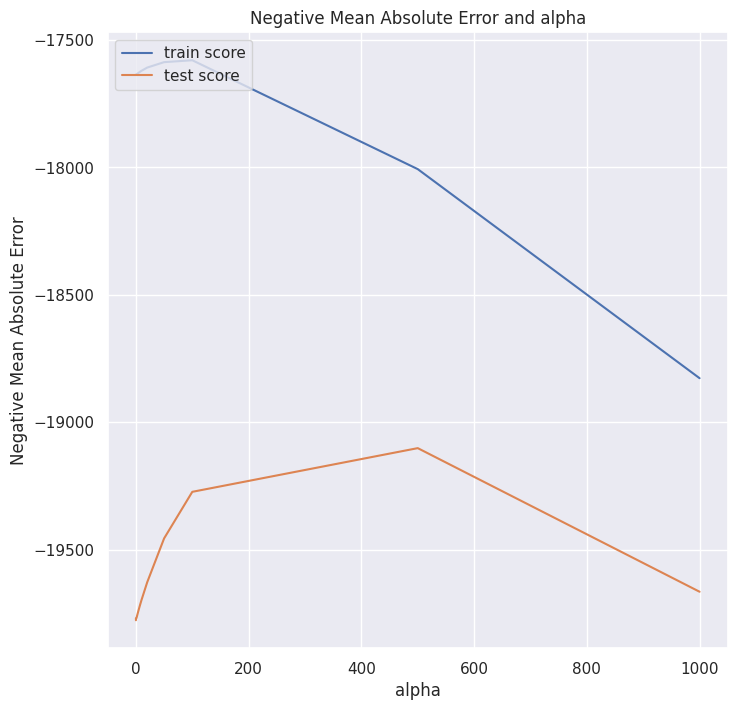

In [156]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [157]:
alpha = 500
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_


array([  152.73032851, -2298.51481831,  -447.2470645 ,  3732.62758945,
        1789.43263019, -1037.92131592,   471.91452498,  -614.02429093,
         517.31437199,  1515.73841948,  -404.94740635, -2252.31185604,
       -2450.48432504,  -540.06632452,  8983.90139226,  3208.98933271,
        1624.14459573,  2558.76596471,  1299.41885845,  2096.19603175,
        -621.34602049,   157.02555964,  1472.91462531,  5234.44701312,
       -5995.17846292,   898.4152192 ,  1462.1352327 , -7027.17201429,
         333.60528569, -2631.51663052,   -12.47046611,  6156.19416534,
          78.15079035,   810.63326601,   306.24116054,  7042.77393498,
          43.77822492, -2282.95228118,   551.9005117 ,  -303.25807791,
        6594.2326664 ,  5928.34674871, -1196.08009268,  9729.46534926,
        2321.71847474,  -217.06533405,  3107.45806806,  2454.27148794,
       -1000.67964866, -2748.00469404, -6151.48650459,  4565.56698189,
        3300.78965511,  4204.86492206,  -242.75283604,   577.25308171,
      

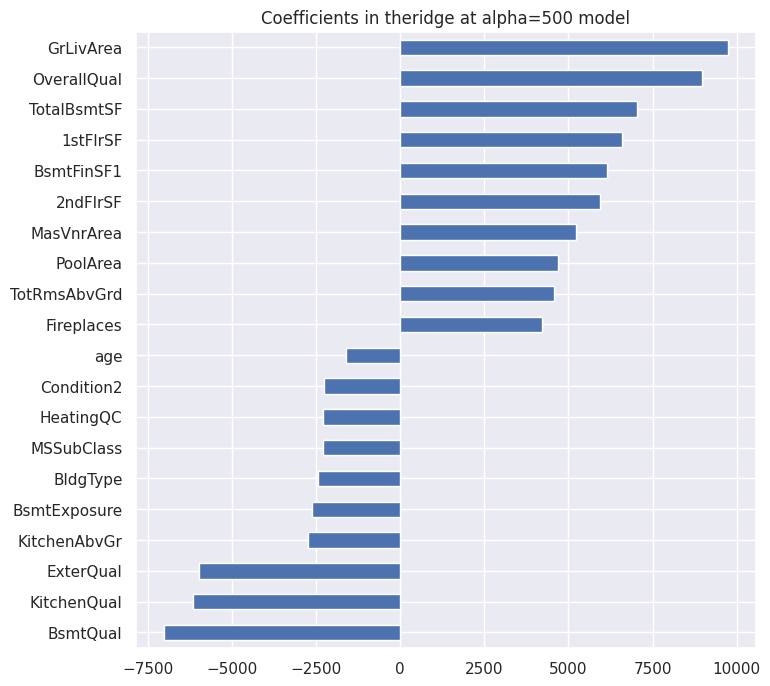

In [158]:
def barh_graph(coefficient,modelType):
    coef = pd.Series(coefficient, index = X_train.columns)
    imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
    plt.rcParams['figure.figsize'] = (8.0, 8.0)
    imp_coef.plot(kind = "barh")
    plt.title("Coefficients in the"+modelType+"model")
    coef = pd.Series(coefficient, index = X_train.columns)
    imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
    plt.rcParams['figure.figsize'] = (8.0, 8.0)
    imp_coef.plot(kind = "barh")
    plt.title("Coefficients in the"+modelType+"model")
barh_graph(ridge.coef_,"ridge at alpha=500 ")

In [159]:
### The top 5 features to use for ridge regression at alpha=500 would be GrLiveArea,OverallQual,TotalBsmtSF,1stFlSF,2ndFlSF

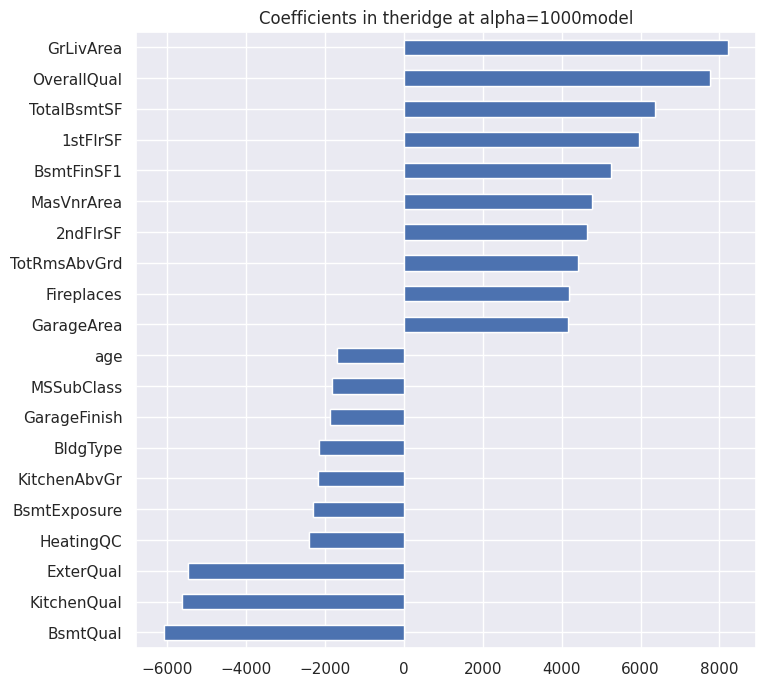

In [160]:
alpha = 1000
ridge1000 = Ridge(alpha=alpha)
ridge1000.fit(X_train, y_train)
ridge1000.coef_
barh_graph(ridge1000.coef_,"ridge at alpha=1000")

In [161]:
ridge1000.coef_

array([  -46.19927196, -1822.04442659,  -394.41645372,  3267.14570472,
        1468.30850676, -1248.5070567 ,   233.5612311 ,  -608.88774923,
         554.97832509,  1488.60754955,  -226.4986447 , -1329.33294857,
       -2145.86561032,   -93.79319769,  7766.20547309,  2208.58181604,
        1703.54183187,  2603.23044564,  1629.48025819,  1914.99510901,
        -188.2323105 ,   193.64556825,  1654.68878451,  4764.18023967,
       -5478.78821416,   702.98959662,  1398.66448723, -6080.72927113,
         277.75286301, -2290.01104671,  -439.40656825,  5260.69580995,
         -14.96191194,   519.86321482,   660.51825581,  6372.95942823,
         -20.73215393, -2411.59016429,   872.3880663 ,   136.9969954 ,
        5950.43307423,  4644.17389762,  -824.18306068,  8205.30658321,
        2223.0705206 ,   -91.550481  ,  3205.75270121,  2369.67320805,
         -78.28302677, -2167.85680881, -5628.60682878,  4408.11028608,
        2554.53547816,  4184.30781197,  -616.62826039,   983.65495304,
      

In [162]:
Ridge_train_score = ridge.score(X_train,y_train)
Ridge_test_score = ridge.score(X_test, y_test)

Ridge_train_score_1000 = ridge1000.score(X_train,y_train)
Ridge_test_score_1000 = ridge1000.score(X_test, y_test)
print("Ridge Train Score at alpha=500  :",Ridge_train_score)
print("Ridge Test Score at alpha=500  :",Ridge_test_score)
print("Difference:",Ridge_train_score-Ridge_test_score)
print("Ridge Train Score at alpha=1000  :",Ridge_train_score_1000)
print("Ridge Test Score at alpha=1000  :",Ridge_test_score_1000)
print("Difference:",Ridge_train_score_1000-Ridge_test_score_1000)


Ridge Train Score at alpha=500  : 0.8720494042376031
Ridge Test Score at alpha=500  : 0.8518464273745072
Difference: 0.02020297686309591
Ridge Train Score at alpha=1000  : 0.8561342816515716
Ridge Test Score at alpha=1000  : 0.8470819454255615
Difference: 0.009052336226010094


### LASSO Regression

In [163]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, return_train_score=True,verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 33 candidates, totalling 330 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.01, 0.02, 0.03,
                                   0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [164]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.072071,0.017057,0.002677,0.000050,0.0001,{'alpha': 0.0001},-19320.099807,-17292.580671,-22655.697707,-20041.413586,...,-17429.647565,-17425.638116,-18036.593283,-17051.672054,-17906.285518,-17560.399988,-17471.602229,-17917.955304,-17636.310176,293.821074
1,0.109666,0.008011,0.002625,0.000083,0.0005,{'alpha': 0.0005},-19320.097779,-17292.579615,-22655.696843,-20041.412794,...,-17429.647018,-17425.637819,-18036.592923,-17051.671946,-17906.285198,-17560.399818,-17471.601834,-17917.954951,-17636.309849,293.821035
2,0.111481,0.002595,0.002620,0.000070,0.001,{'alpha': 0.001},-19320.095243,-17292.578294,-22655.695762,-20041.411806,...,-17429.646334,-17425.637449,-18036.592472,-17051.671811,-17906.284797,-17560.399605,-17471.601341,-17917.954510,-17636.309439,293.820988
3,0.102868,0.024934,0.002627,0.000065,0.01,{'alpha': 0.01},-19320.049603,-17292.554527,-22655.676312,-20041.394005,...,-17429.634020,-17425.630780,-18036.584359,-17051.669377,-17906.277583,-17560.395776,-17471.592468,-17917.946574,-17636.302066,293.820129
4,0.079848,0.024223,0.002703,0.000139,0.02,{'alpha': 0.02},-19319.998891,-17292.528118,-22655.654700,-20041.374227,...,-17429.620338,-17425.623370,-18036.575344,-17051.666672,-17906.269568,-17560.391522,-17471.582608,-17917.937755,-17636.293874,293.819175


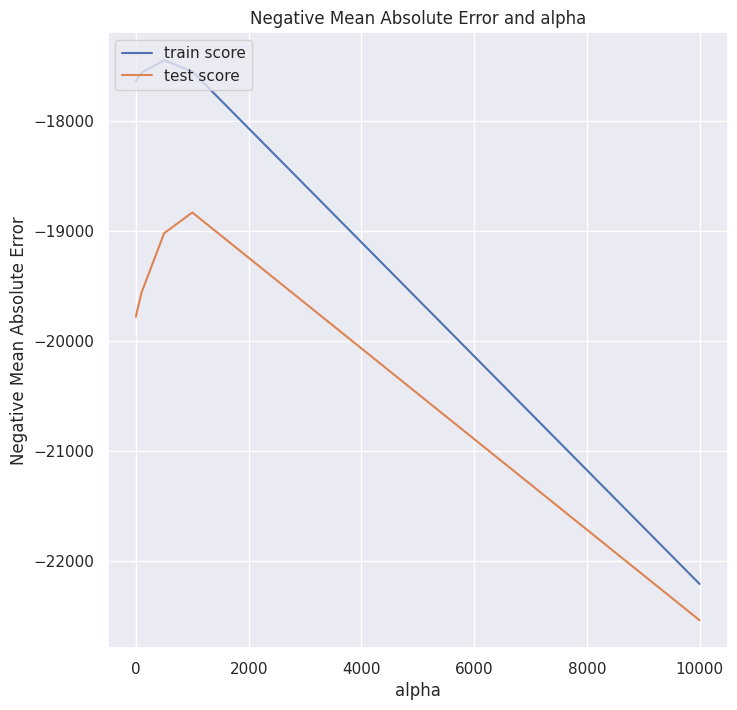

In [165]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [166]:
#Lasso Regression at alpha=1000
alpha =1000
lasso = Lasso(alpha=alpha)       
lasso.fit(X_train, y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score)
print("test score: ", test_score)
print("difference",train_score-test_score)
print("number of features used: ", coeff_used)

#Lasso Regression at alpha=2000

lasso001 = Lasso(alpha=2000, max_iter=1000)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

print("training score:", train_score001)
print("test score: ", test_score001)
print("difference",train_score001-test_score001)
print("number of features used: ", coeff_used001)

#With alpha at 1000 and no of features at 34, i select the first lasso regression model and present the coefficients selected

training score: 0.8797447265304671
test score:  0.8488939855596065
difference 0.030850740970860602
number of features used:  41
training score: 0.8709314592503142
test score:  0.8561591343357781
difference 0.014772324914536172
number of features used:  28


In [167]:
lasso.coef_

array([    0.        , -5249.68555336,    -0.        ,  4548.01835327,
        1395.86687311,    -0.        ,    78.54201059,    -0.        ,
           0.        ,   173.69371005,    -0.        , -3205.88571742,
        -598.15137333,    -0.        , 12986.81079227,  4057.83966621,
        3616.97296141,  1449.79733529,     0.        ,   694.59428325,
         -46.63419673,    -0.        ,   251.29339869,  4769.0565338 ,
       -6371.91341594,   322.24919482,   534.32140491, -9382.32761189,
           0.        , -2479.84654177,     0.        ,  8411.28842338,
          -0.        ,   554.49790829,    -0.        ,  7122.73156935,
           0.        ,  -874.33273933,     0.        ,    -0.        ,
           0.        ,     0.        , -2277.87269196, 28765.65926454,
         549.71631362,    -0.        ,     0.        ,     0.        ,
       -1523.14536969, -1964.75741569, -6316.47627263,     0.        ,
        3775.10665231,  3228.06015826,    -0.        ,     0.        ,
      

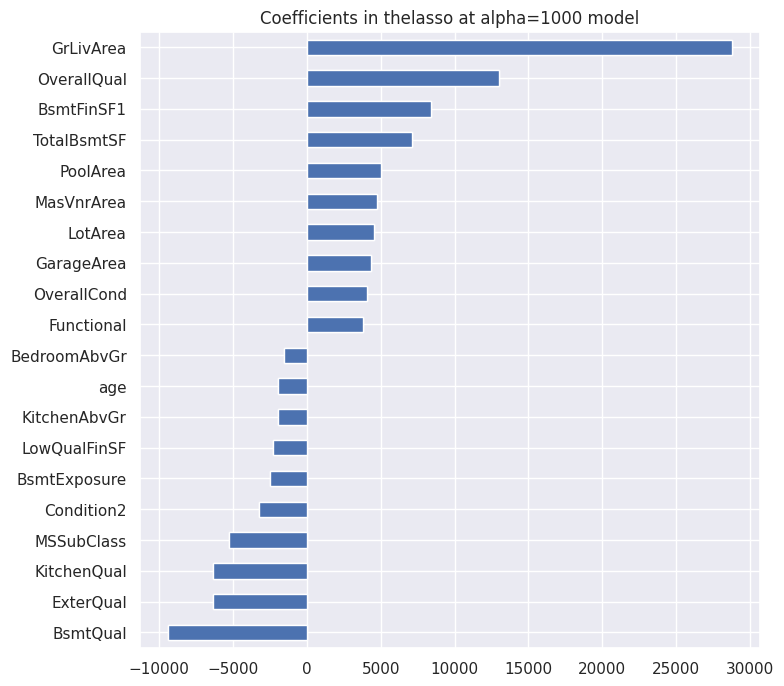

In [168]:
barh_graph(lasso.coef_,"lasso at alpha=1000 ")

In [169]:
# The top 5 feaatures for getting the best model would be GrLiveArea,OverallQuall,TotalBsmtSF,BsmtFinSF1,MasVnrArea

### Lasso Regression with removal of top 5 variables


In [170]:
# coef_.sort_values().tail(10)

In [171]:
X_train.shape

(1021, 74)

In [172]:
X_train = X_train.drop(['GrLivArea', 'OverallQual','TotalBsmtSF','BsmtFinSF1','MasVnrArea'], axis = 1)
X_train.shape

(1021, 69)

In [173]:
alpha =1000
lasso1 = Lasso(alpha=alpha)       
lasso1.fit(X_train, y_train)
# cross validation
model_cv = GridSearchCV(estimator = lasso1, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, return_train_score=True,verbose = 1)            
model_cv.fit(X_train, y_train)
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

Fitting 10 folds for each of 33 candidates, totalling 330 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.075565,0.022602,0.002686,0.000137,0.0001,{'alpha': 0.0001},-23261.787389,-17697.132044,-23940.837587,-22245.329230,...,-19213.511032,-19282.384465,-19775.895459,-18883.616985,-19982.686465,-19481.189119,-19406.919169,-19688.853150,-19483.596564,325.452080
1,0.066679,0.018389,0.002713,0.000102,0.0005,{'alpha': 0.0005},-23261.785700,-17697.130853,-23940.836601,-22245.327879,...,-19213.510757,-19282.384207,-19775.895203,-18883.616810,-19982.686213,-19481.188980,-19406.918898,-19688.852758,-19483.596316,325.452091
2,0.076095,0.019893,0.002757,0.000093,0.001,{'alpha': 0.001},-23261.783588,-17697.129364,-23940.835369,-22245.326190,...,-19213.510412,-19282.383883,-19775.894883,-18883.616593,-19982.685897,-19481.188805,-19406.918559,-19688.852268,-19483.596006,325.452103
3,0.075134,0.021023,0.002713,0.000196,0.01,{'alpha': 0.01},-23261.745580,-17697.102564,-23940.813186,-22245.295793,...,-19213.504209,-19282.378065,-19775.889120,-18883.612675,-19982.680213,-19481.185665,-19406.912464,-19688.843447,-19483.590426,325.452330
4,0.086286,0.022671,0.002710,0.000103,0.02,{'alpha': 0.02},-23261.703348,-17697.072787,-23940.788539,-22245.262018,...,-19213.497317,-19282.371601,-19775.882717,-18883.608322,-19982.673897,-19481.182175,-19406.905692,-19688.833647,-19483.584226,325.452582


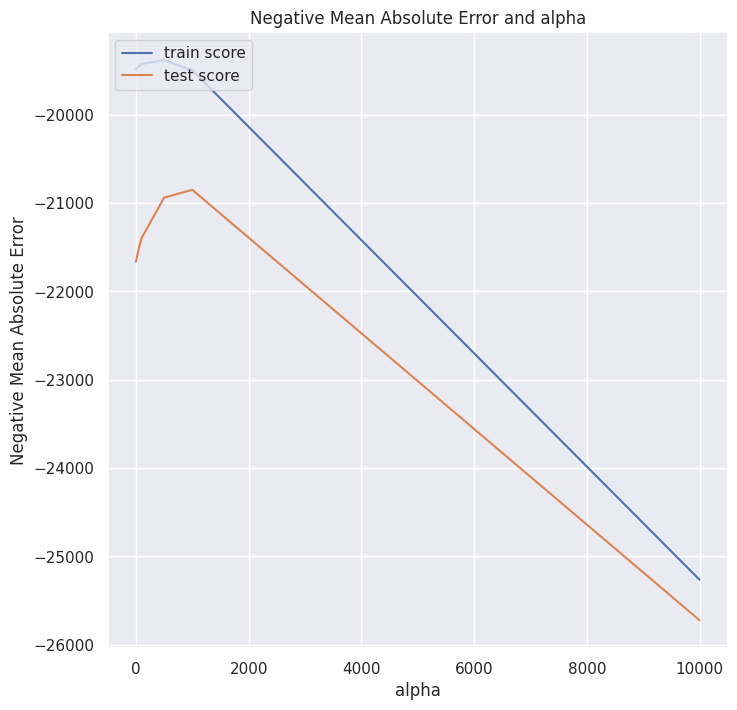

In [174]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

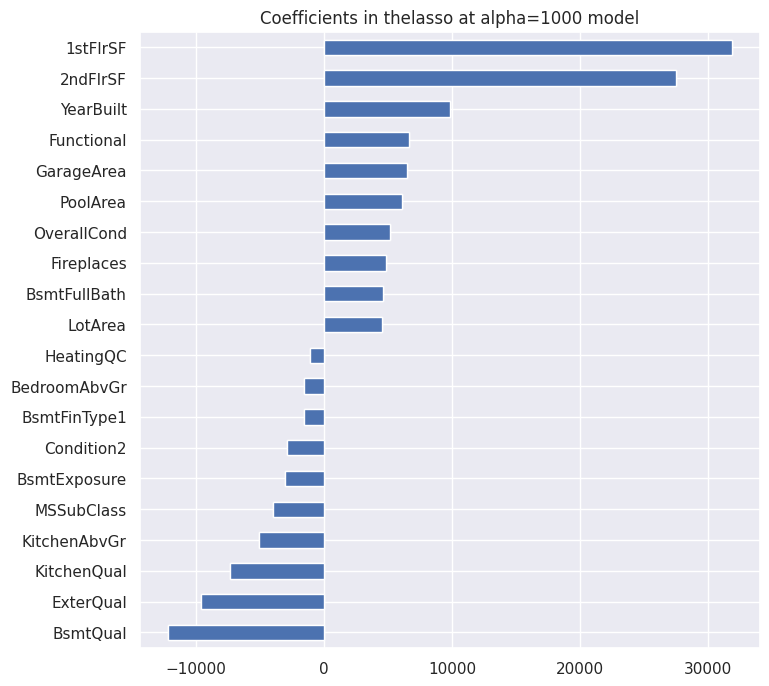

In [175]:
barh_graph(lasso1.coef_,"lasso at alpha=1000 ")

In [176]:
houseTest

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,age
0,1461,20,2,11622,1,3,3,4,0,12,...,0,0,120,0,0,6,2010,8,4,63
1,1462,20,3,14267,1,0,3,0,0,12,...,0,0,0,0,12500,6,2010,8,4,66
2,1463,60,3,13830,1,0,3,4,0,8,...,0,0,0,0,0,3,2010,8,4,27
3,1464,60,3,9978,1,0,3,4,0,8,...,0,0,0,0,0,6,2010,8,4,26
4,1465,120,3,5005,1,0,1,4,0,22,...,0,0,144,0,0,1,2010,8,4,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,4,1936,1,3,3,4,0,10,...,0,0,0,0,0,6,2006,8,4,54
1455,2916,160,4,1894,1,3,3,4,0,10,...,0,0,0,0,0,4,2006,8,0,54
1456,2917,20,3,20000,1,3,3,4,0,11,...,0,0,0,0,0,9,2006,8,0,64
1457,2918,85,3,10441,1,3,3,4,0,11,...,0,0,0,0,700,7,2006,8,4,32


In [178]:
houseTest = houseTest.drop(['GrLivArea', 'OverallQual','TotalBsmtSF','BsmtFinSF1','MasVnrArea'], axis = 1)
houseTest.shape

(1459, 69)

In [179]:
stacked_pred = model_cv.predict(houseTest.values)

In [180]:
houseTest['SalePrice'] = stacked_pred

In [181]:
Submission=houseTest[['Id', 'SalePrice']]
Submission.to_csv('submission.csv', index=None)